In [ ]:
!nvidia-smi

Sun Apr 14 14:16:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
HOME = '/content/drive/MyDrive/50_eponchYOLOv8'
print(HOME)

/content/drive/MyDrive/50_eponchYOLOv8


In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qeurMItsrfyR1IsxYkDb")
project = rf.workspace("reduceddataset").project("reduce-zub6u")
version = project.version(3)
dataset = version.download("yolov8")

/content/drive/MyDrive/50_eponchYOLOv8/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Reduce-3 in yolov8:: 100%|██████████| 13792/13792 [01:46<00:00, 129.92it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/content/drive/MyDrive/50_eponchYOLOv8
100% 21.5M/21.5M [00:00<00:00, 166MB/s]
New https://pypi.org/project/ultralytics/8.1.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/50_eponchYOLOv8/datasets/Reduce-3/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, sh

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1713104487.9d281ba8a476.2532.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch12080.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch12081.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch12082.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


/content/drive/MyDrive/50_eponchYOLOv8


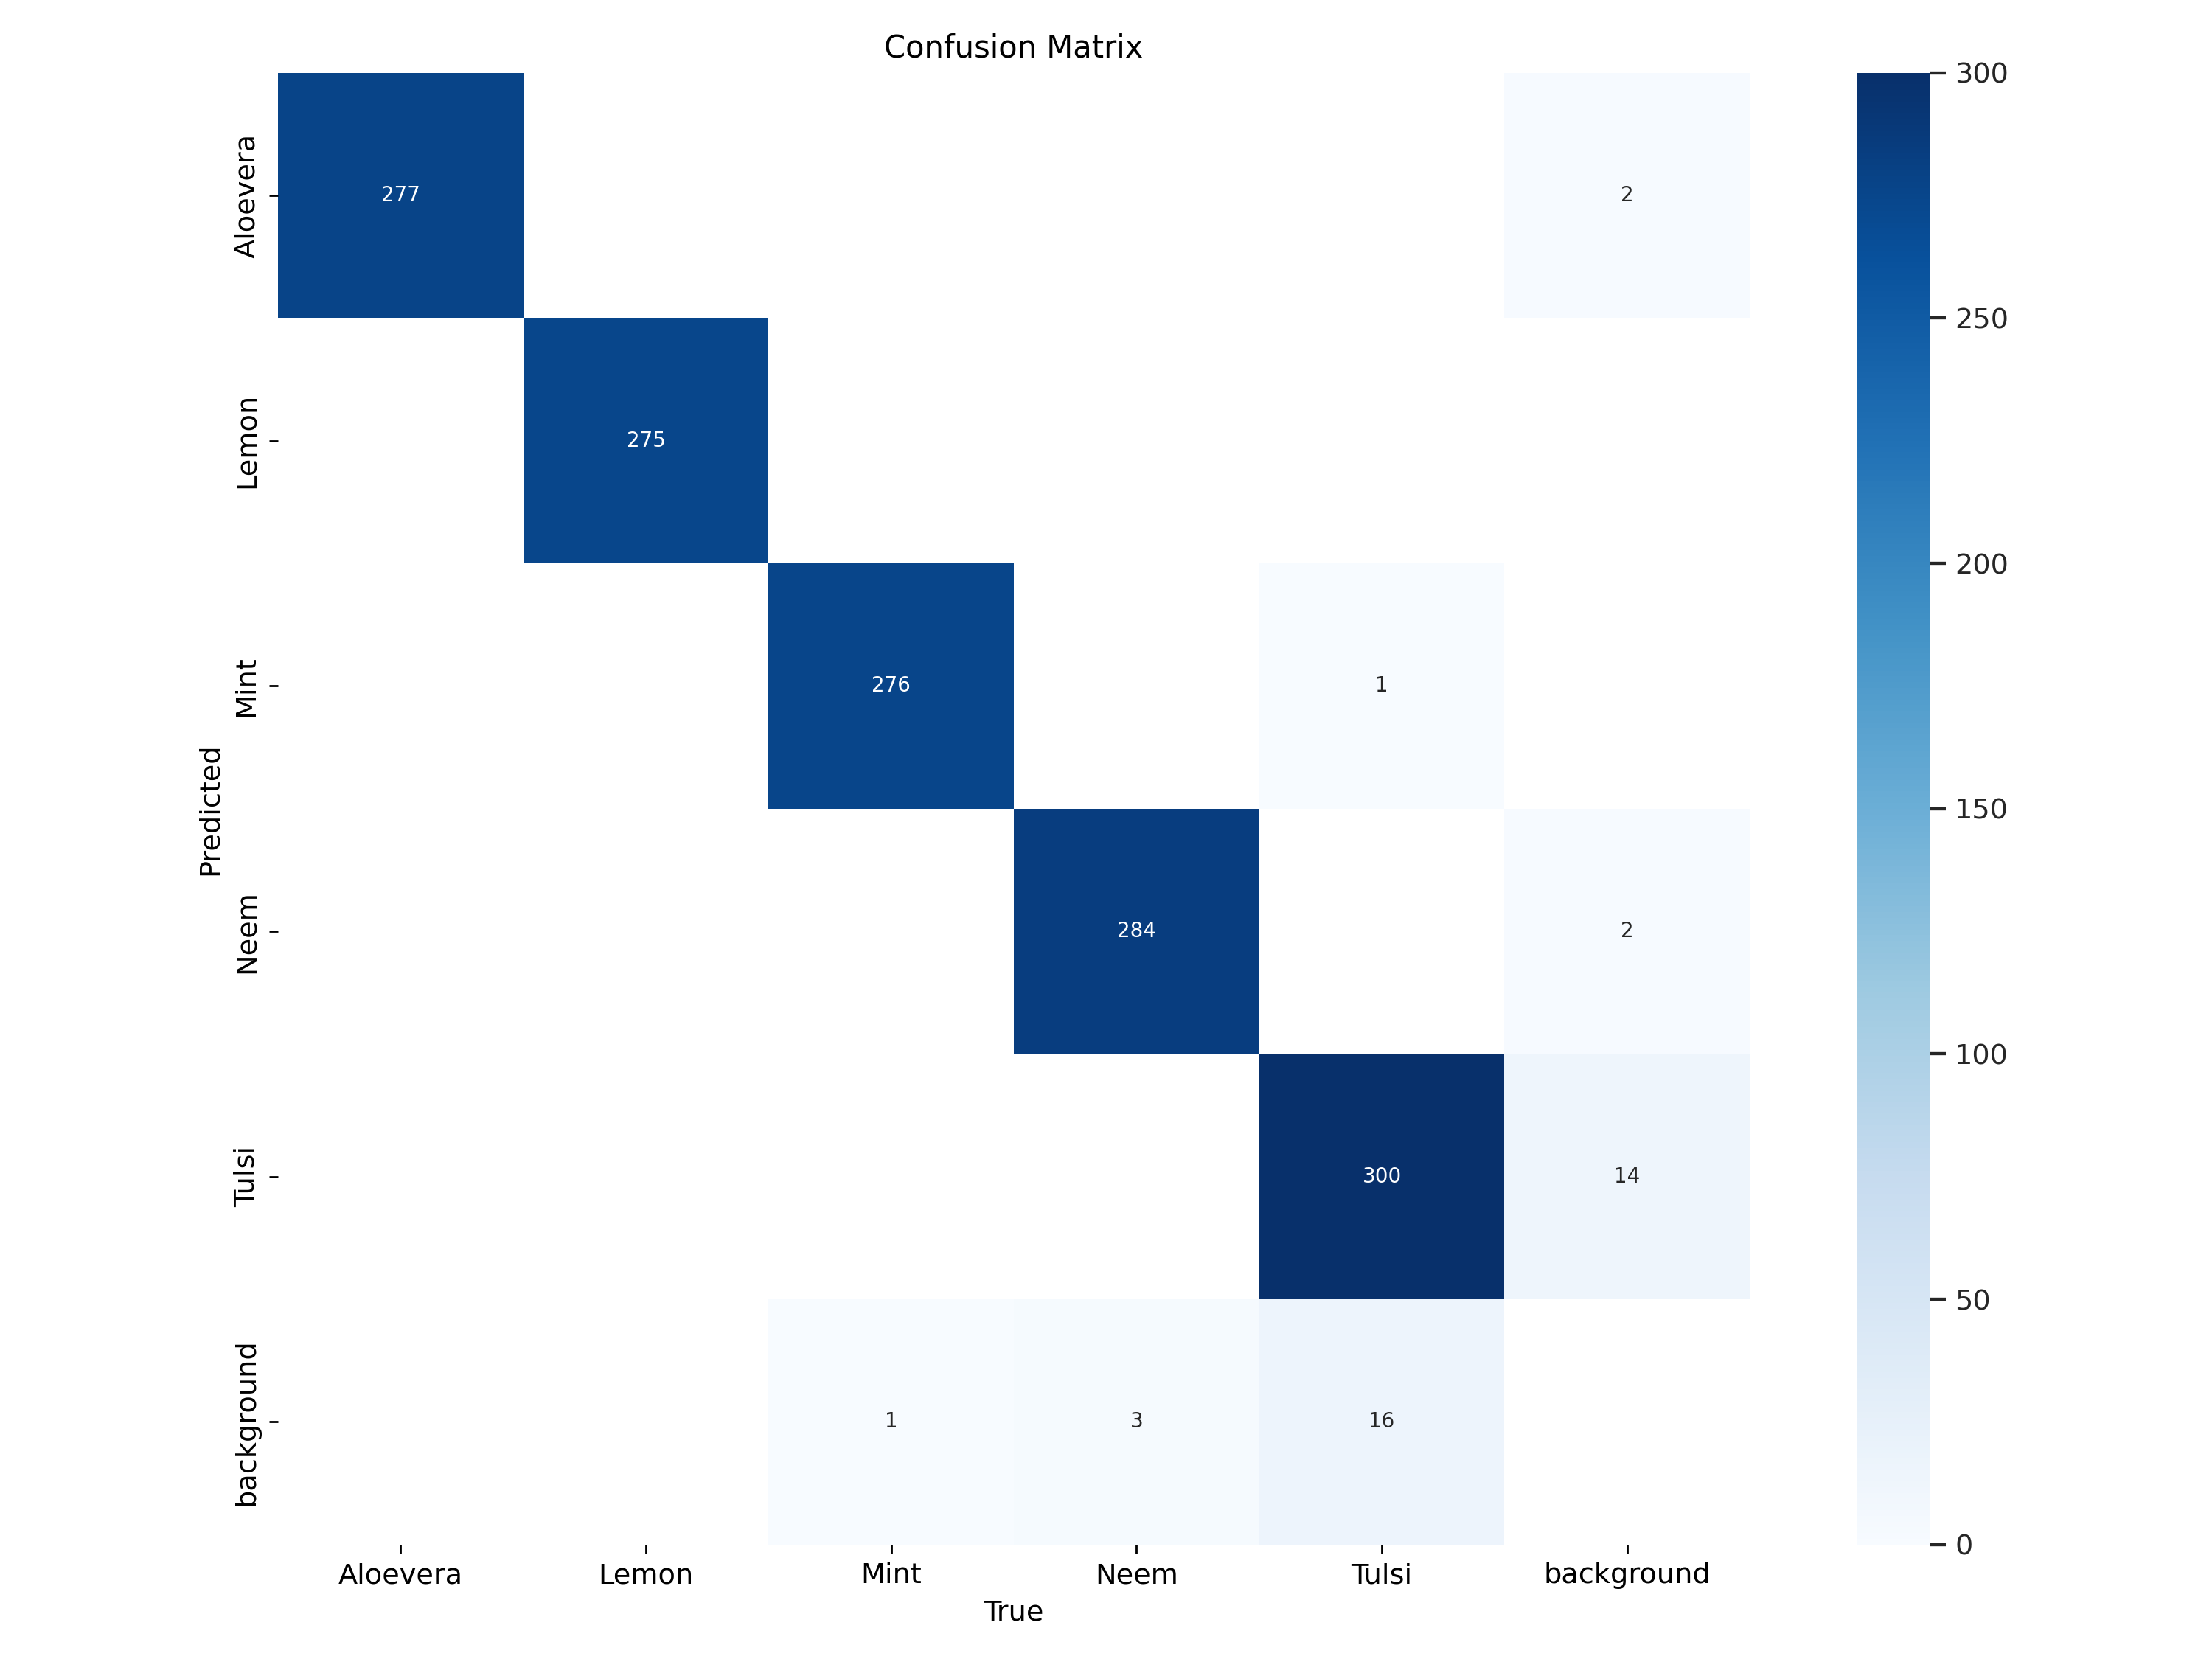

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content/drive/MyDrive/50_eponchYOLOv8


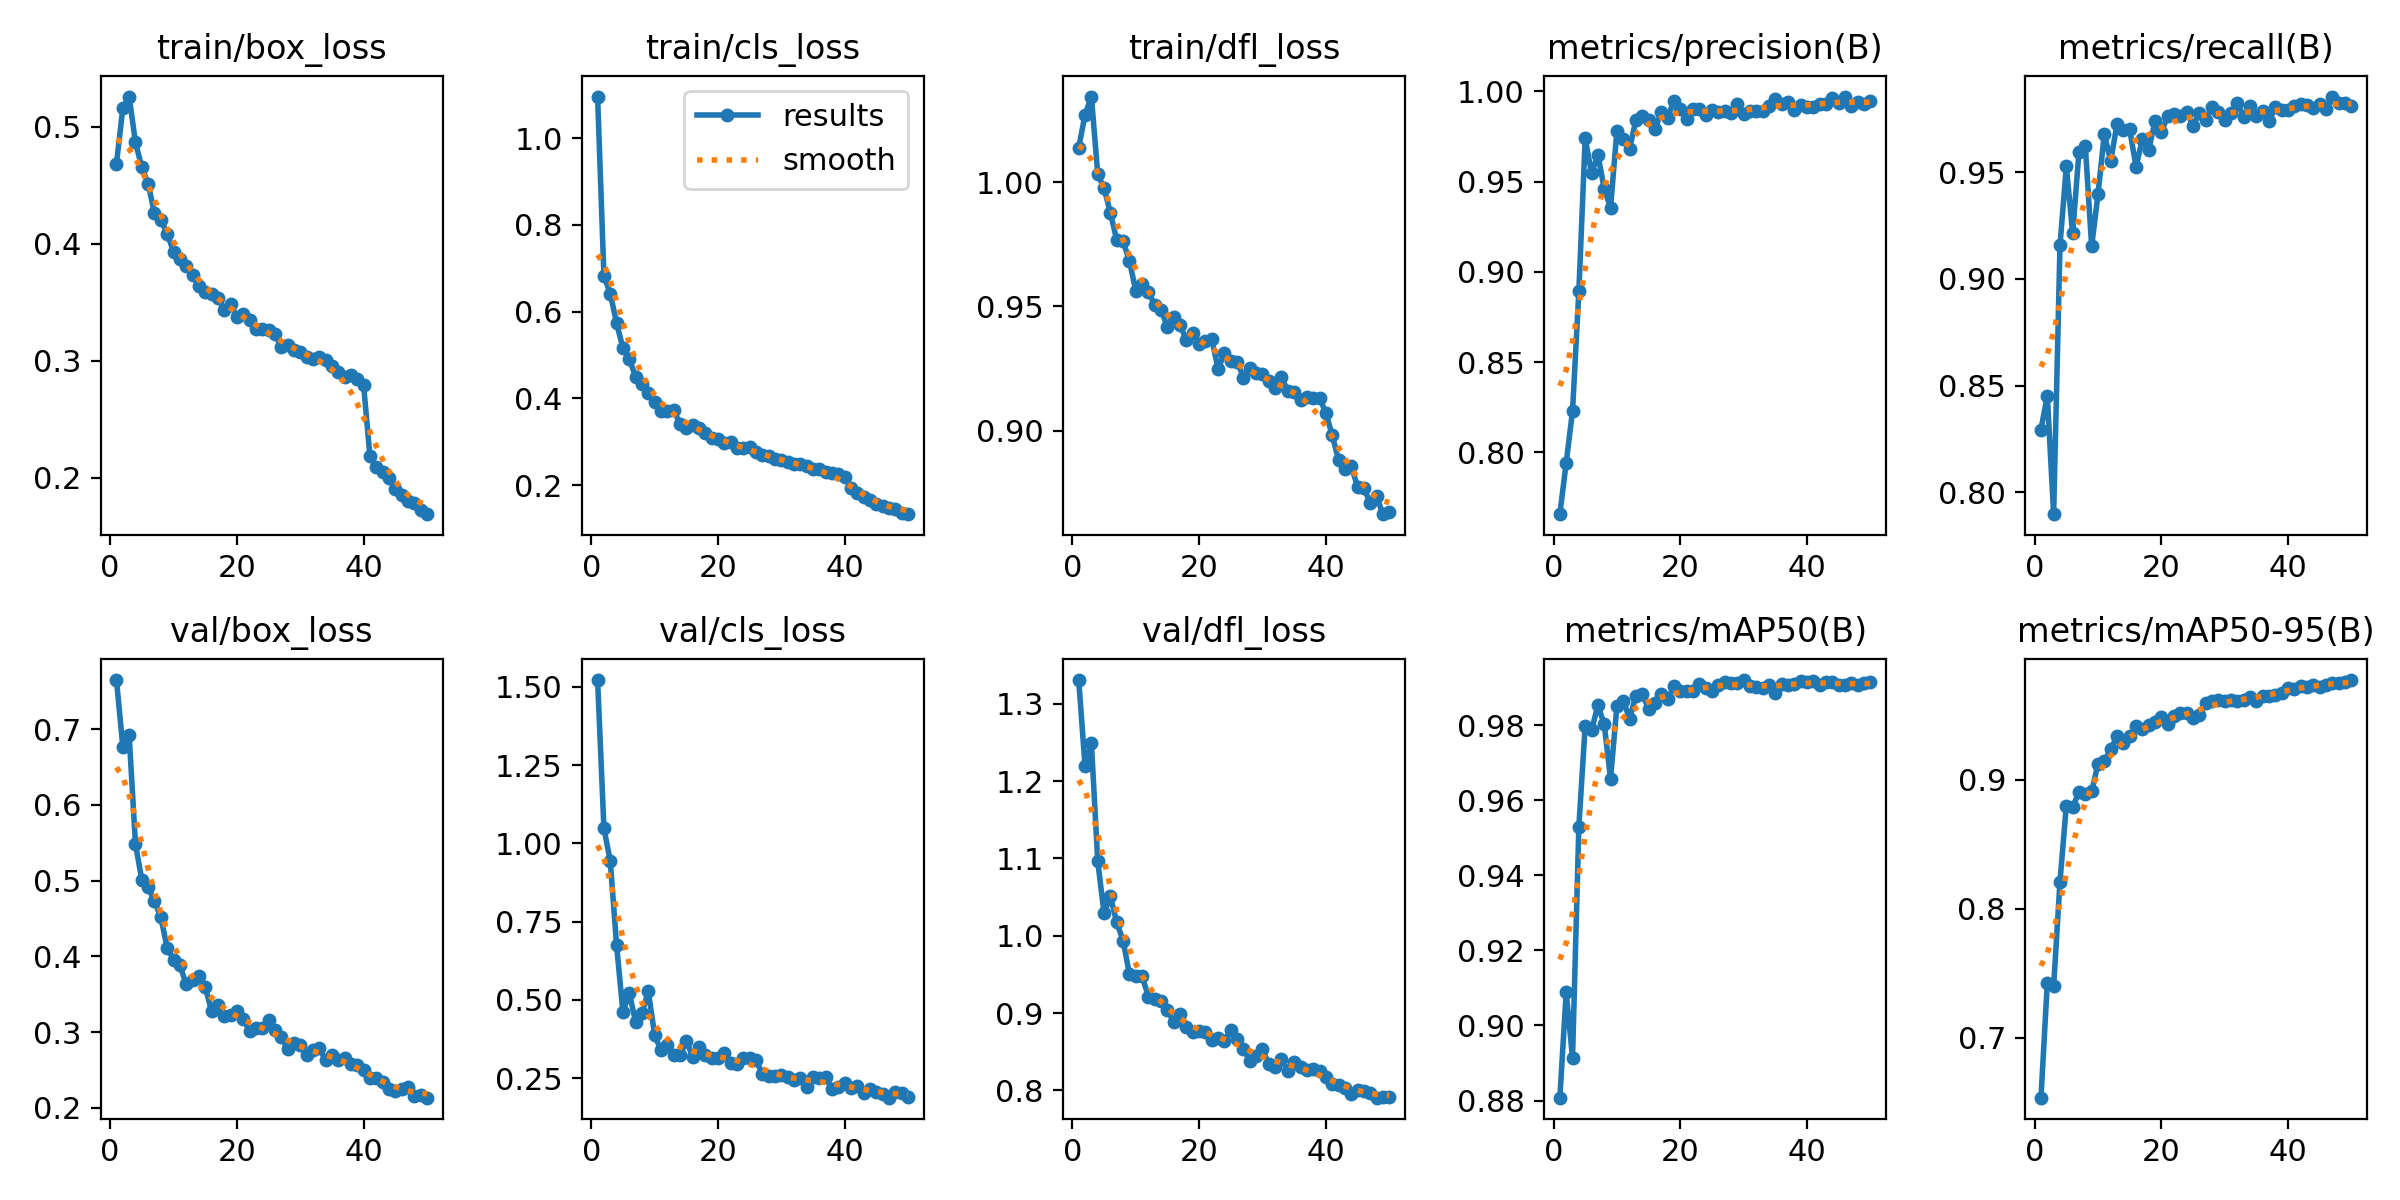

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content/drive/MyDrive/50_eponchYOLOv8


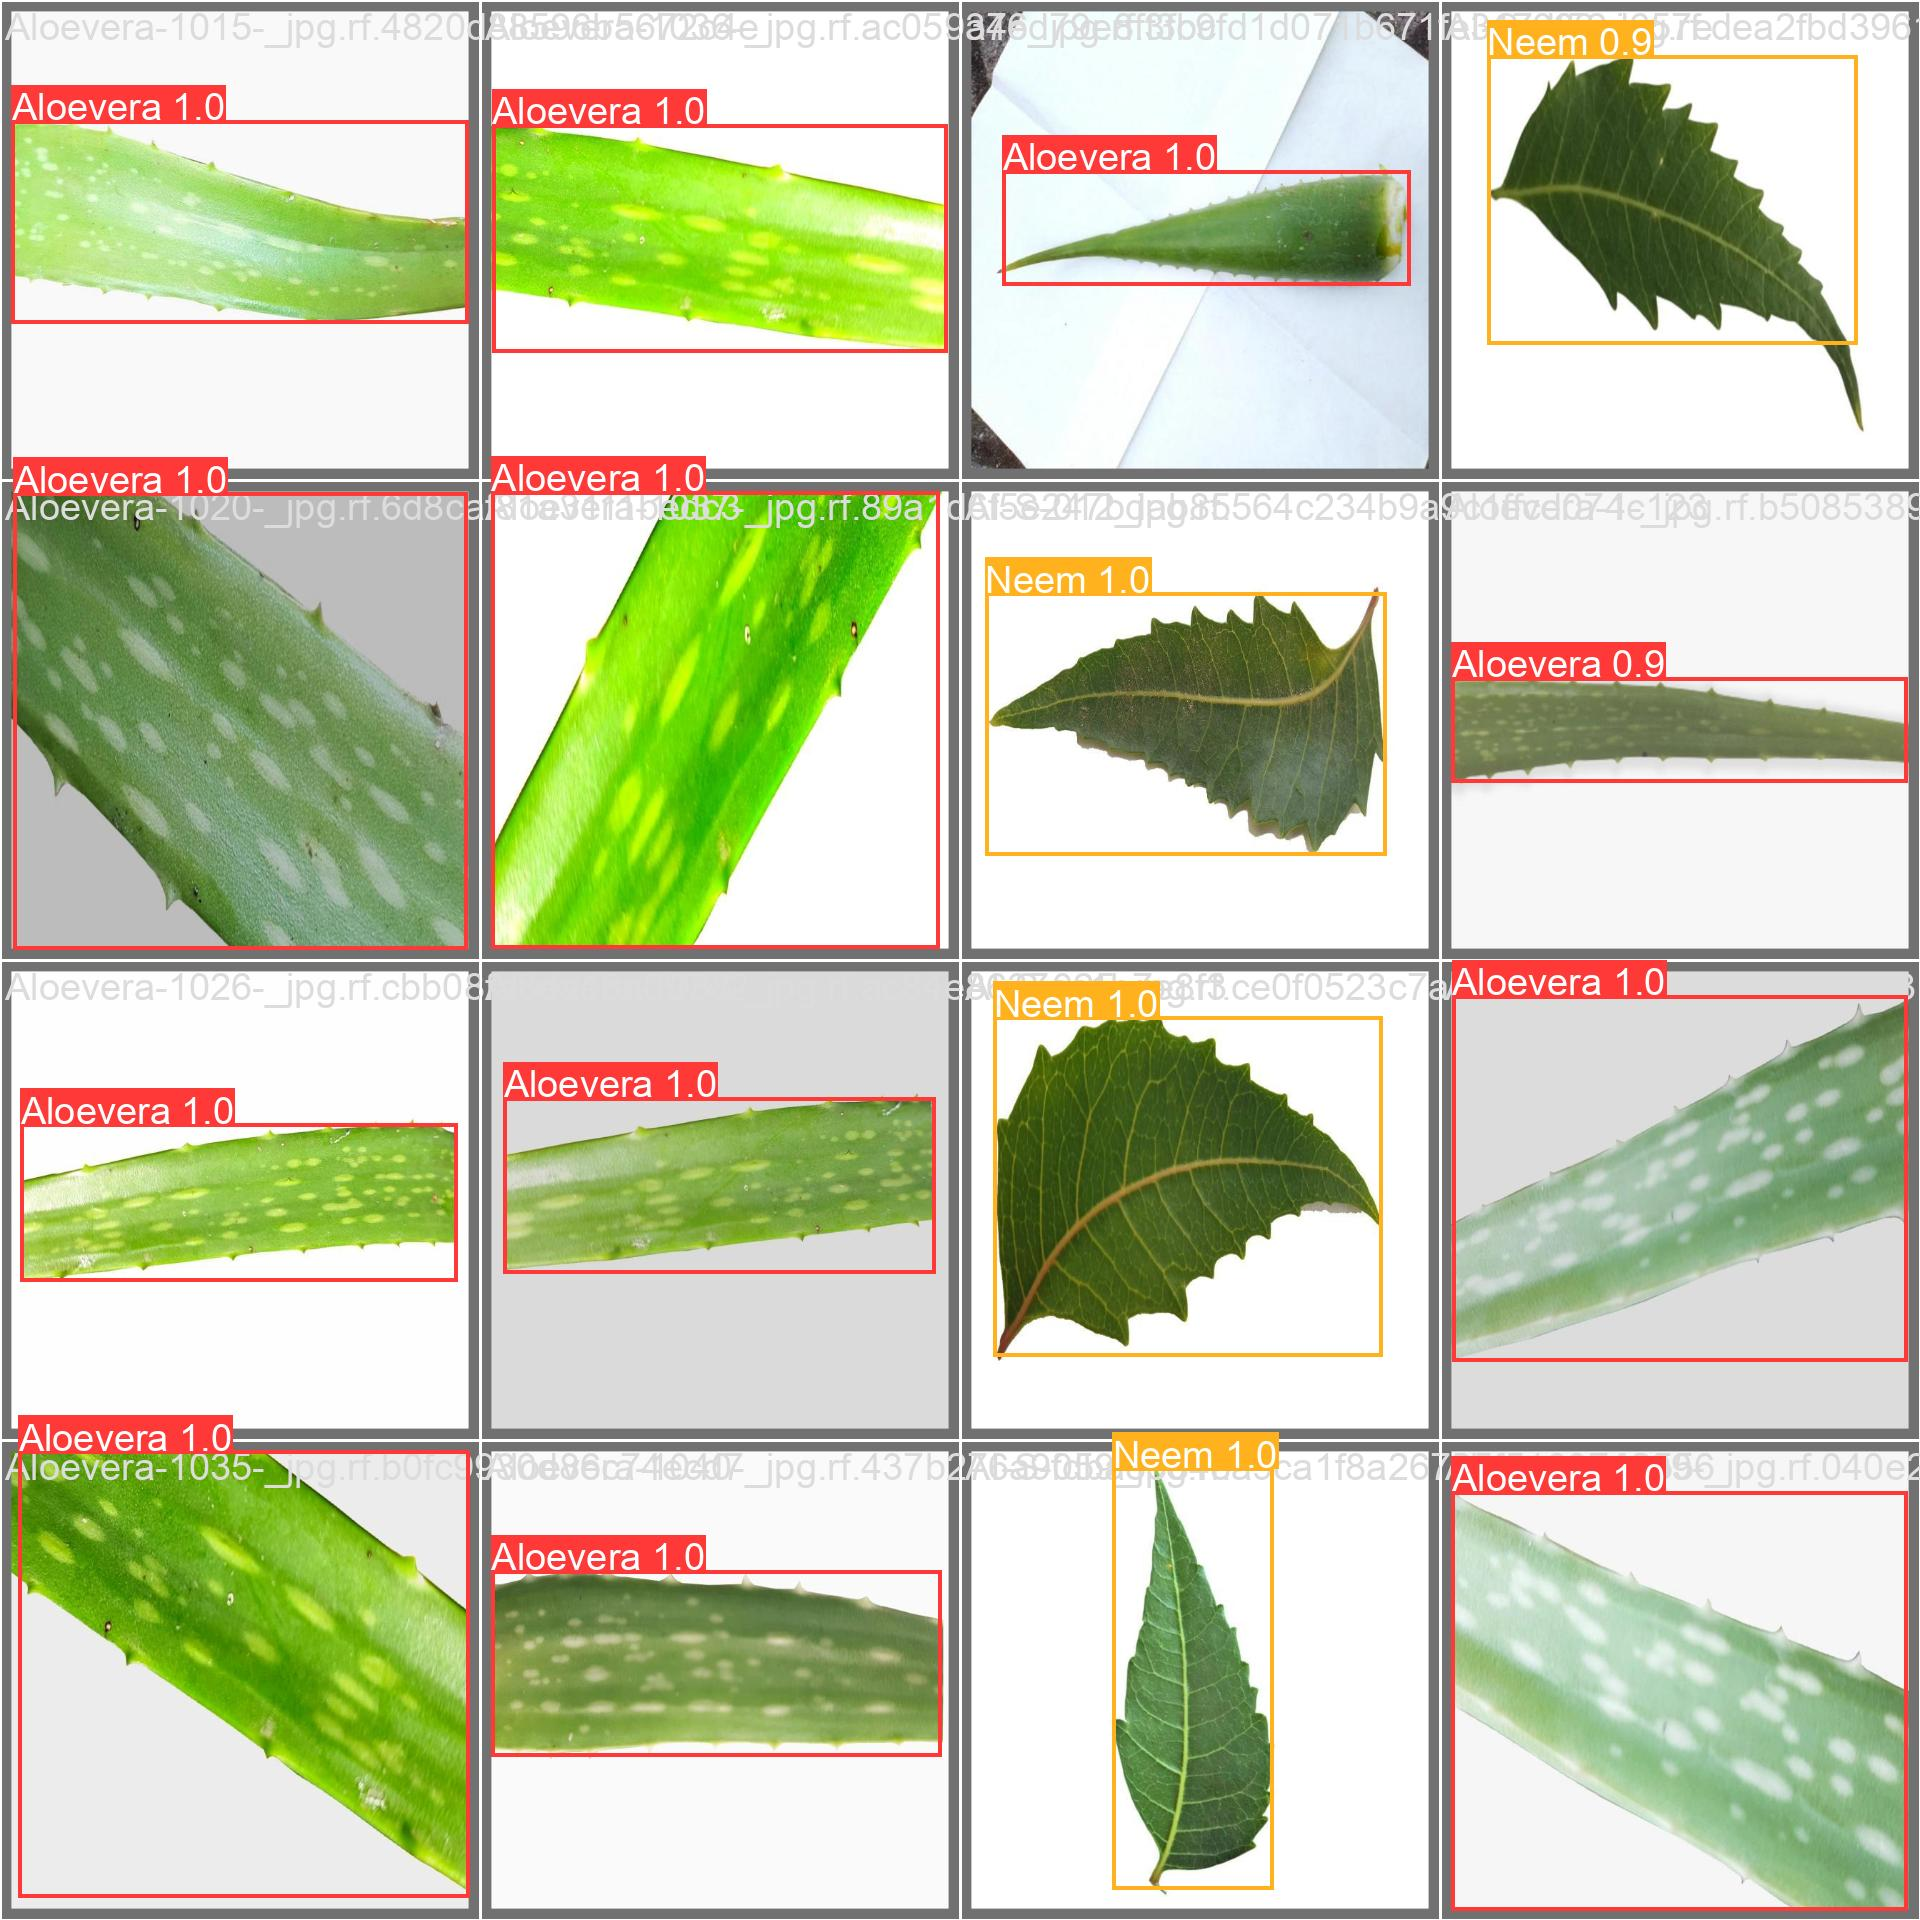

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model=/content/drive/MyDrive/50_eponchYOLOv8/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/50_eponchYOLOv8/datasets/Reduce-3/data.yaml

/content/drive/MyDrive/50_eponchYOLOv8
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/50_eponchYOLOv8/datasets/Reduce-3/valid/labels.cache... 1378 images, 1 backgrounds, 0 corrupt: 100% 1378/1378 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 87/87 [00:35<00:00,  2.45it/s]
                   all       1378       1433      0.995      0.981      0.991      0.977
              Aloevera       1378        277      0.993      0.997      0.995      0.993
                 Lemon       1378        275      0.999          1      0.995      0.995
   

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/drive/MyDrive/50_eponchYOLOv8/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/50_eponchYOLOv8/datasets/Reduce-3/test/images save=True

/content/drive/MyDrive/50_eponchYOLOv8
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/689 /content/drive/MyDrive/50_eponchYOLOv8/datasets/Reduce-3/test/images/116_jpg.rf.7a499247dd4f4594824cbb06c4a301b2.jpg: 640x640 1 Aloevera, 16.3ms
image 2/689 /content/drive/MyDrive/50_eponchYOLOv8/datasets/Reduce-3/test/images/122_jpg.rf.fafeec1a8ef814db4599dee942457682.jpg: 640x640 1 Aloevera, 16.4ms
image 3/689 /content/drive/MyDrive/50_eponchYOLOv8/datasets/Reduce-3/test/images/124_jpg.rf.da6d72d5878093b01890a9dc4195b2e4.jpg: 640x640 1 Aloevera, 16.4ms
image 4/689 /content/drive/MyDrive/50_eponchYOLOv8/datasets/Reduce-3/test/images/126_jpg.rf.3d58cc38ea272ea59aaab0ccc9198a2c.jpg: 640x640 1 Aloevera, 16.3ms
image 5/689 /content/drive/MyDrive/50_eponchYOLOv8/datasets/Reduce-3/test/images/208_jpg.rf.82b921b5edbca543c3a1c00ec8c59

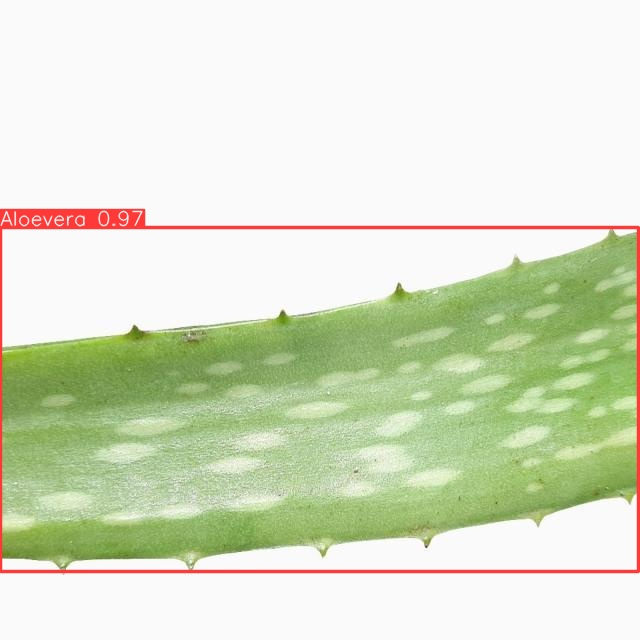

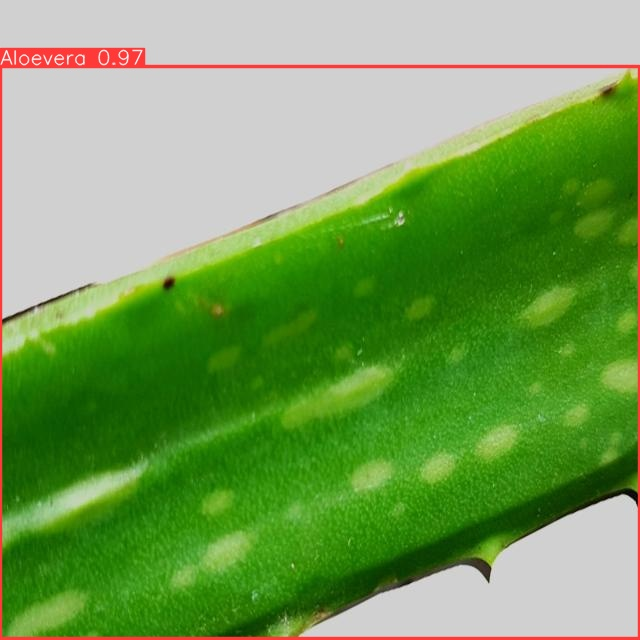

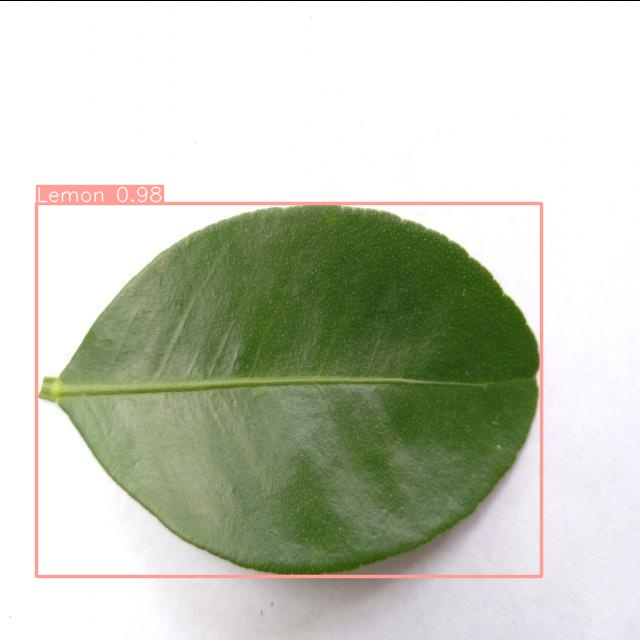

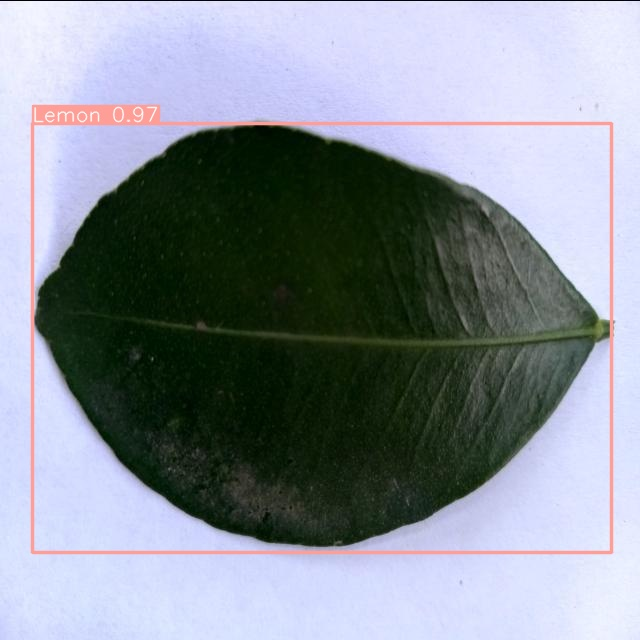

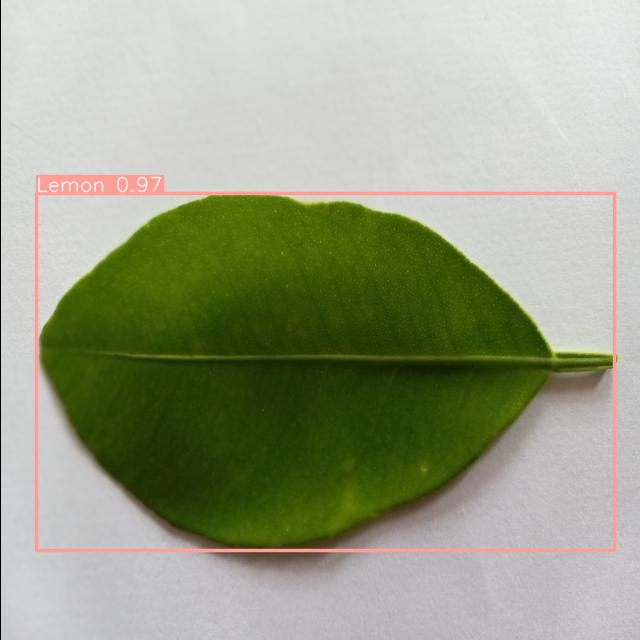

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/drive/MyDrive/50_eponchYOLOv8/runs/detect/predict/*.jpg')[115:120]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/reduceddataset/reduce-zub6u/3
Share your model with the world at: https://universe.roboflow.com/reduceddataset/reduce-zub6u/model/3


In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/reduceddataset/reduce-zub6u/3
Share your model with the world at: https://universe.roboflow.com/reduceddataset/reduce-zub6u/model/3


Storing Dataset Folder

In [ ]:
!cp -r /content/datasets /content/drive/MyDrive/Solo_Trained_Dataset/Lemon

Storing Run Folder

In [ ]:
!cp -r /content/drive/MyDrive/Combine/runs /content/drive/MyDrive

Remaining Files

In [ ]:
!cp -r /content/yolov8n.pt /content/drive/MyDrive

In [ ]:
!cp -r /content/yolov8s.pt /content/drive/MyDrive

In [ ]:
model.save('YOLOv8.h5')